In [2]:
# lab4
# part 1 (8)

from matplotlib import pyplot as plt

data_x = [
    8, 13, 17, 6, 14, 21, 2, 16, 18, 15,
    9, 10, 7, 22, 3, 5, 12, 19, 4, 20, 11
]
data_y = [
    1.9, 1, 1, 2.2, 1.3, 0.8, 2.2, 0.9, 0.8, 1.3, 1.5,
    1.3, 1.9, 0.7, 3.1, 2.5, 1.1, 0.6, 2.8, 0.6, 1.2
]


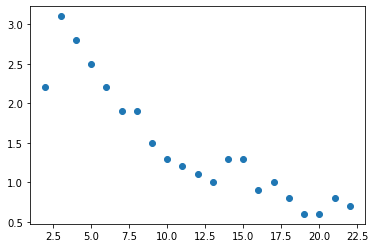

In [3]:
plt.scatter(data_x, data_y)

In [8]:
# according to scatter plot, correlation is non-linear
assert len(data_y) == len(data_x)
N = len(data_x)
x_mean = sum(data_x)/N
y_mean = sum(data_y)/N
xy_mean = sum(x * y for x, y in zip(data_x, data_y))/N
x_dispersion = sum((i - x_mean) ** 2 for i in data_x) / (N - 1)
x_standard_deviation = x_dispersion ** 0.5
y_dispersion = sum((i - y_mean) ** 2 for i in data_y) / (N - 1)
y_standard_deviation = y_dispersion ** 0.5
r = (xy_mean - (x_mean * y_mean)) / (x_standard_deviation * y_standard_deviation)
t = (r * ((N - 2) ** 0.5)) / ((1 - (r ** 2)) ** 0.5)
t_quantile = 2.09
print("N =", N)
print("x mean =", x_mean)
print("y mean =", y_mean)
print("xy mean =", xy_mean)
print("x std =", x_standard_deviation)
print("y std =", y_standard_deviation)
print("r^ =", r)
print("t statistic =", t)
print("t quantile =", t_quantile)
print(f"r^ is {'not ' if abs(t) <= t_quantile else ''}significant")


N = 21
x mean = 12.0
y mean = 1.461904761904762
xy mean = 13.52857142857143
x std = 6.2048368229954285
y std = 0.7412666122767101
r^ = -0.8727773675911694
t statistic = -7.793903269096083
t quantile = 2.09
r^ is significant


In [10]:
u_quantile = 1.96
r_interval_middle = r + (r * (1 - (r ** 2)) / (2 * N))
r_interval_scatter = (u_quantile * ((1 - (r ** 2)) / ((N - 1) ** 0.5)))
r_interval = (r_interval_middle - r_interval_scatter, r_interval_middle + r_interval_scatter)
print("r^ interval =", r_interval)

r^ interval = (-0.9821504049158638, -0.7733065990586798)


In [11]:
# part 2 (9)

def get_ranks(items: list):
    sorted_items = sorted(items)
    ranks = []
    current_indexes_sum = 0
    current_rank_size = 0
    current_value = None
    for i in range(len(sorted_items)):
        if not current_value:
            current_value = sorted_items[i]
        if current_value == sorted_items[i]:
            current_rank_size += 1
            current_indexes_sum += (i + 1)
        else:
            ranks.extend(
                current_indexes_sum / current_rank_size for _ in range(current_rank_size)
            )
            current_value = sorted_items[i]
            current_indexes_sum = i + 1
            current_rank_size = 1
        if i == len(sorted_items) - 1:
            ranks.extend(
                current_indexes_sum / current_rank_size for _ in range(current_rank_size)
            )
    rank_map = {i: j for i, j in zip(sorted_items, ranks)}
    return [rank_map[i] for i in items]

x_ranks = get_ranks(data_x)
y_ranks = get_ranks(data_y)

x_ranks_mean = sum(x_ranks)/N
y_ranks_mean = sum(y_ranks)/N
xy_ranks_mean = sum(x * y for x, y in zip(x_ranks, y_ranks))/N
x_ranks_dispersion = sum((i - x_ranks_mean) ** 2 for i in x_ranks) / (N - 1)
x_ranks_standard_deviation = x_ranks_dispersion ** 0.5
y_ranks_dispersion = sum((i - y_ranks_mean) ** 2 for i in y_ranks) / (N - 1)
y_ranks_standard_deviation = y_ranks_dispersion ** 0.5
r_for_ranks = (xy_ranks_mean - (x_ranks_mean * y_ranks_mean)) /\
    (x_ranks_standard_deviation * y_ranks_standard_deviation)
print("x ranks:", x_ranks)
print("y ranks:", y_ranks)
print("tau_c =", r_for_ranks)


x ranks: [7.0, 12.0, 16.0, 5.0, 13.0, 20.0, 1.0, 15.0, 17.0, 14.0, 8.0, 9.0, 6.0, 21.0, 2.0, 4.0, 11.0, 18.0, 3.0, 19.0, 10.0]
y ranks: [15.5, 7.5, 7.5, 17.5, 12.0, 4.5, 17.5, 6.0, 4.5, 12.0, 14.0, 12.0, 15.5, 3.0, 21.0, 19.0, 9.0, 1.5, 20.0, 1.5, 10.0]
tau_c = -0.9036958688057302
